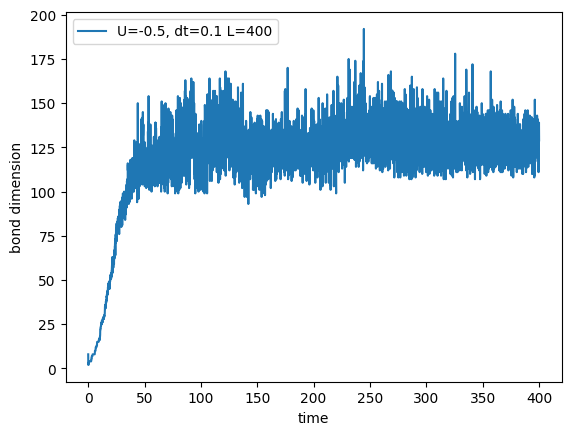

In [59]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

plt.ylabel("bond dimension")
plt.xlabel("time")

dt=0.1
lab="b"
U=-0.5
for L in [400]:
    n0=np.loadtxt(f"data/noipf/ipc_U{U}_dt{dt}_cdt{dt}_cnImp2/L{L}/irlm_no_L{L}.txt", skiprows=1)
    #n0old=np.loadtxt(f"data/dt{dt}/tdvp_no8/L{L}/irlm_no_L{L}.txt", skiprows=1)
    #n0gs2=np.loadtxt(f"data/noip/ipa_U0.25_dt{dt}_cdt0.1_cnImp-1/L{L}/irlm_no_L{L}.txt", skiprows=1)
    #plt.plot(n0old[:,0],n0old[:,2], label=f"old: dt={dt} L={L}", color="green")
    #plt.plot(n0gs2[:,0],n0gs2[:,2], label=f"gs2 as imp, active IP: dt={dt} L={L}", color="blue")
    plt.plot(n0[:,0],n0[:,2], label=f"U={U}, dt={dt} L={L}")    
plt.legend(loc="upper left")

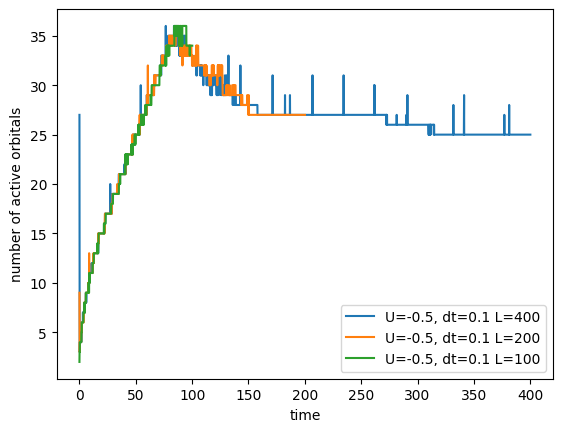

In [60]:
plt.ylabel("number of active orbitals")
plt.xlabel("time")

dt=0.1
for L in [400,200,100]:
    n0=np.loadtxt(f"data/noipf/ipc_U{U}_dt{dt}_cdt{dt}_cnImp2/L{L}/irlm_no_L{L}.txt", skiprows=1)
    #n0gs2=np.loadtxt(f"data/noip/ipa_U0.25_dt{dt}_cdt0.1_cnImp-1/L{L}/irlm_no_L{L}.txt", skiprows=1)
    #plt.plot(n0gs2[:,0],n0gs2[:,6], label=f"gs2 as imp, active IP: dt={dt} L={L}", color="blue")
    plt.plot(n0[:,0],n0[:,6], label=f"U={U}, dt={dt} L={L}")    
plt.legend()

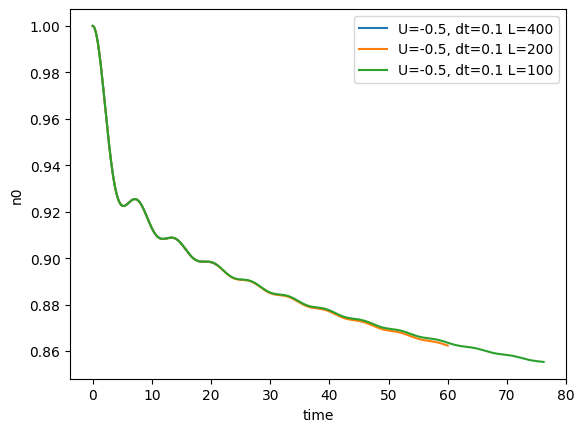

In [166]:
plt.ylabel("n0")
plt.xlabel("time")

dt=0.1
for L in [400,200,100]:
    n0=np.loadtxt(f"data/noip_paper/ipc_U-0.5_dt0.1_cdt0.1_cnImp2_ed-10/L{L}/irlm_no_L{L}.txt", skiprows=1)
    #n0gs2=np.loadtxt(f"data/noip/ipa_U0.25_dt{dt}_cdt0.1_cnImp-1/L{L}/irlm_no_L{L}.txt", skiprows=1)
    #plt.plot(n0gs2[:,0],n0gs2[:,6], label=f"gs2 as imp, active IP: dt={dt} L={L}", color="blue")
    plt.plot(n0[:,0],n0[:,4], label=f"U={U}, dt={dt} L={L}")    
plt.legend()

### Real space occupations

In [1]:
def LoadComplexData(file,**genfromtext_args):
    """
    Load complex data in the C++ format in numpy.
    """
    array_as_strings = np.loadtxt(file,dtype=str,**genfromtext_args)
    complex_parser = np.vectorize(lambda x: complex(*eval(x)))
    return complex_parser(array_as_strings)

(200.0000000000016+0j) (1+0j) (1+0j)
(100.00000000000064+0j) (1+0j) (1+0j)
(50.00000000000016+0j) (1+0j) (1+0j)
(26.000000000000043+0j) (1+0j) (1+0j)
(12.000000000000016+0j) (1+0j) 0j


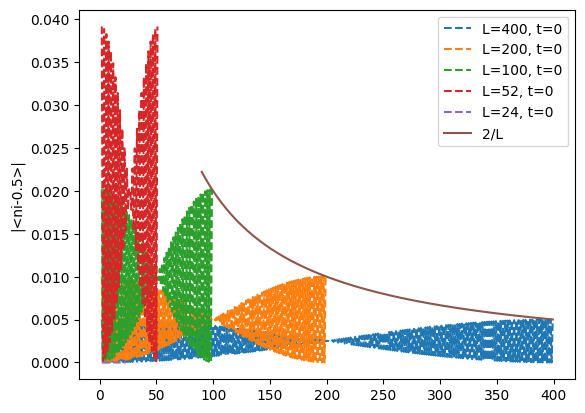

In [126]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
figure, axis = plt.subplots(1, 1)

U=-0.5
ed=-10
for ti in [0]:
    for L in [400,200,100,52,24]:    
        suffix=f"t{ti*10}"
        cc=LoadComplexData(f"data/noipf/ipc_U{U}_dt{dt}_cdt{dt}_cnImp2/L{L}/cc_L{L}_{suffix}.txt")
        orb=LoadComplexData(f"data/noipf/ipc_U{U}_dt{dt}_cdt{dt}_cnImp2/L{L}/orb_L{L}_{suffix}.txt")
        orb=np.matrix(orb)
        ccr = orb @ cc @ orb.H
        axis.plot(range(2,L),[0.5-x for x in ccr.diagonal().tolist()[0][2:]], '--', label=f'L={L}, t={ti}')
        print(np.trace(ccr), cc[0,0],cc[1,1])
axis.plot(range(90,400),[2/x for x in range(90,400)], '-', label=f'2/L')
axis.legend()
#axis.set_ylim(0,0.1)
axis.set_ylabel("|<ni-0.5>|")
plt.show()

(50.000000000009265+4.807312411707142e-15j) (0.9123875743241762+1.3395580774763268e-17j) (0.6588095712740373-8.343361483045459e-18j)
(100.0000000000141-1.1840718676339747e-14j) (0.9123658180032131-2.5205363657278174e-17j) (0.6588007326387568+1.7917065074763687e-17j)
(50.000000000039435+3.1955884193138312e-15j) (0.8695986232788167+5.057598516686782e-18j) (0.6384515619108152-1.9212476188912313e-18j)
(100.0000000000718-5.1432523190416345e-14j) (0.8687790651203945+9.814314684216467e-18j) (0.6382145767112384-3.734534434725337e-18j)


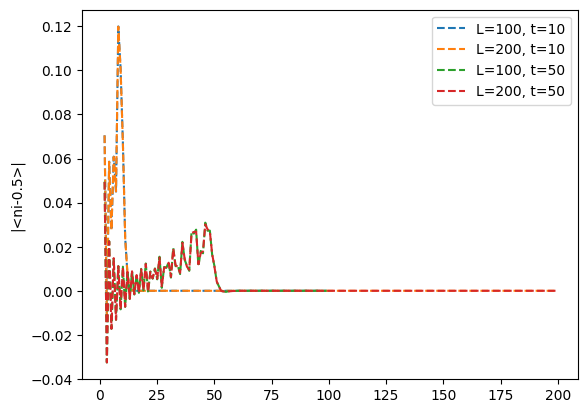

In [165]:
figure, axis = plt.subplots(1, 1)

U=-0.5
ed=-10
for ti in [10,50]:
    for L in [100,200]:    
        suffix=f"t{ti*10}"
        #suffix="gs2"
        cc=LoadComplexData(f"data/noip_paper/ipc_U-0.5_dt0.1_cdt0.1_cnImp2_ed-10/L{L}/cc_L{L}_{suffix}.txt")
        orb=LoadComplexData(f"data/noip_paper/ipc_U-0.5_dt0.1_cdt0.1_cnImp2_ed-10/L{L}/orb_L{L}_{suffix}.txt")
        orb=np.matrix(orb)
        ccr = orb @ cc @ orb.H
        axis.plot(range(2,L),[0.5-x for x in ccr.diagonal().tolist()[0][2:]], '--', label=f'L={L}, t={ti}')
        print(np.trace(ccr), cc[0,0],cc[1,1])
axis.legend()
#axis.set_ylim(0,0.1)
axis.set_ylabel("|<ni-0.5>|")
plt.show()

### Kondo correlation

(181.22132756837414+4.5439235229040506e-14j) (0.829334334274322+3.815201282472155e-18j)
(368.36187988755654+1.3611067115300705e-14j) (0.8523552882333955-2.559836604076805e-17j)
(175.01472138820233-3.880688692131846e-14j) (0.7735216467152025-2.548040374989294e-17j)
(360.00650553672375-1.510118352644631e-13j) (0.8141494205299031-4.163337150970308e-18j)
(168.58434390323146+3.9274992084041344e-14j) (0.7177421162157118-2.698319787952451e-17j)
(351.9298711728726-3.0455498560743826e-14j) (0.7780474661345864+4.224177183647147e-18j)
(161.90317763959916-1.4776778798043555e-13j) (0.6619955960759645-2.473135050958929e-18j)
(343.88208704841054-4.757091673975148e-14j) (0.7428874746675793-7.412788611509889e-18j)
(155.02542761234378+2.6643776198083073e-15j) (0.6069600939911778-1.071258579164892e-17j)
(335.76579662065956-2.018876313135892e-13j) (0.7082493262336419+1.0061267103792446e-18j)
(148.04831877002272+2.55697916008847e-14j) (0.5535675869363238+1.7554061382225194e-17j)
(327.5358523722359+2.407515

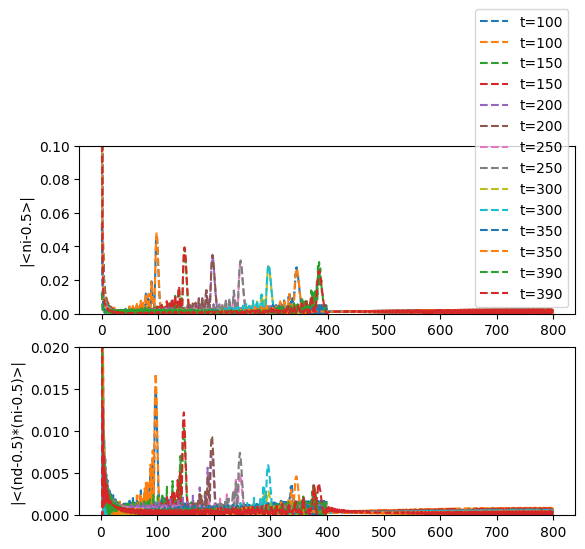

In [70]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
figure, axis = plt.subplots(2, 1)

for ti in [100,150,200,250,300,350,390]:
    for L in [400,800]:    
        suffix=f"t{ti*10}"
        cc=LoadComplexData(f"data/noipf/ipc_U{U}_dt{dt}_cdt{dt}_cnImp2/L{L}/cc_L{L}_{suffix}.txt")
        cck=LoadComplexData(f"data/noipf/ipc_U{U}_dt{dt}_cdt{dt}_cnImp2/L{L}/cck_L{L}_{suffix}.txt")
        orb=LoadComplexData(f"data/noipf/ipc_U{U}_dt{dt}_cdt{dt}_cnImp2/L{L}/orb_L{L}_{suffix}.txt")
        orb=np.matrix(orb)
        ccr = orb @ cc @ orb.H
        cckr = orb @ cck @ orb.H
        #axis[1].plot(range(2,L),[abs(x) for x in (cckr*np.sqrt(ccr[0,0])-ccr*ccr[0,0]).diagonal().tolist()[0][2:]], '--', label=f't={ti}')
        axis[0].plot(range(0,L),[abs(x-0.5) for x in ccr.diagonal().tolist()[0][0:]], '--', label=f't={ti}')
        axis[1].plot(range(2,L),[abs(x) for x in (cckr*np.sqrt(ccr[0,0])-0.5*ccr-0.5*ccr[0,0]+0.25).diagonal().tolist()[0][2:]], '--', label=f't={ti}')
        print(np.trace(cckr), ccr[0,0])

axis[0].legend()
axis[0].set_ylim(0,0.1)
axis[0].set_ylabel("|<ni-0.5>|")

axis[1].set_ylabel("|<(nd-0.5)*(ni-0.5)>|")
#axis[1].set_yscale("log")
axis[1].set_ylim(0,0.02)
plt.show()

In [33]:
ccr[0,0]

(0.5028323345977321-1.015748147204738e-17j)